<a href="https://colab.research.google.com/github/blinov-89/DTP/blob/main/%22XGBClassifier_%22Score_%3D_0_419947_%D0%94%D0%A2%D0%9F_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [3]:
 from scipy import stats
 from scipy.stats import randint
 from sklearn.model_selection import RandomizedSearchCV
 from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка датасета

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Дагестан ДТП ИИ/train_dataset_train.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35771 entries, 0 to 35770
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35771 non-null  int64  
 1   Дата           35771 non-null  object 
 2   Время          35771 non-null  object 
 3   Место          35771 non-null  object 
 4   Улица          20286 non-null  object 
 5   Дом            20460 non-null  object 
 6   Дорога         10011 non-null  object 
 7   Километр       10010 non-null  float64
 8   Метр           10010 non-null  float64
 9   Вид ДТП        25555 non-null  object 
 10  Погибло        35771 non-null  int64  
 11  Погибло детей  35771 non-null  int64  
 12  Ранено         35771 non-null  int64  
 13  Ранено детей   35771 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 3.8+ MB


In [8]:
w = pd.read_excel("/content/drive/MyDrive/Дагестан ДТП ИИ/погода.xlsx")

In [9]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Местное время в Нижнем Новгороде  1094 non-null   object 
 1   T                                 1094 non-null   float64
 2   Po                                1094 non-null   float64
 3   P                                 1094 non-null   float64
 4   Pa                                1089 non-null   float64
 5   U                                 1094 non-null   int64  
 6   DD                                1094 non-null   object 
 7   Ff                                1094 non-null   int64  
 8   ff10                              973 non-null    float64
 9   ff3                               1021 non-null   float64
 10  N                                 1094 non-null   object 
 11  WW                                1094 non-null   object 
 12  W1    

In [ ]:
w["Местное время в Нижнем Новгороде"].str[:10]

0       31.12.2020
1       30.12.2020
2       29.12.2020
3       28.12.2020
4       27.12.2020
           ...    
1089    05.01.2018
1090    04.01.2018
1091    03.01.2018
1092    02.01.2018
1093    01.01.2018
Name: Местное время в Нижнем Новгороде, Length: 1094, dtype: object

In [10]:
w['Дата'] = w["Местное время в Нижнем Новгороде"].str[:10]

In [11]:
print(list(w.columns.values))

['Местное время в Нижнем Новгороде', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', "E'", 'sss', 'Дата']


In [12]:
w = w.drop(['RRR', 'tR', 'E', 'Tg', "E'", 'sss', 'Tn', 'Tx', 'W1', 'W2', 'Cm', 'Ch', 'Местное время в Нижнем Новгороде'], axis = 1)

In [13]:
df1 = pd.merge(df, w, how='left', on='Дата')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35771 entries, 0 to 35770
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35771 non-null  int64  
 1   Дата           35771 non-null  object 
 2   Время          35771 non-null  object 
 3   Место          35771 non-null  object 
 4   Улица          20286 non-null  object 
 5   Дом            20460 non-null  object 
 6   Дорога         10011 non-null  object 
 7   Километр       10010 non-null  float64
 8   Метр           10010 non-null  float64
 9   Вид ДТП        25555 non-null  object 
 10  Погибло        35771 non-null  int64  
 11  Погибло детей  35771 non-null  int64  
 12  Ранено         35771 non-null  int64  
 13  Ранено детей   35771 non-null  int64  
 14  T              35706 non-null  float64
 15  Po             35706 non-null  float64
 16  P              35706 non-null  float64
 17  Pa             35580 non-null  float64
 18  U     

In [15]:
pd.set_option('display.max_columns', None)

In [ ]:
# df1=pd.concat([df, w], axis=1)

In [ ]:
df1.head(3)

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td
0,490103984,13.07.2018,17:35:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,NaN,NaN,NaN,Столкновение,0,0,0,0,22.9,744.2,757.7,-0.2,66.0,"Ветер, дующий с севера",1.0,2.0,4.0,"90 или более, но не 100%",,Кучево-дождевые волокнистые (часто с наковальн...,"90 или более, но не 100%",600-1000,10.0,16.2
1,490097169,11.05.2018,17:10:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,73,NaN,NaN,NaN,Столкновение,0,0,0,0,15.7,751.7,765.8,-1.2,17.0,"Ветер, дующий с северо-северо-востока",4.0,10.0,10.0,Облаков нет.,,NaN,NaN,NaN,10.0,-9.4
2,490031781,25.01.2020,14:44:00,"Новгородская область, Великий Новгород",Хутынская ул,29,NaN,NaN,NaN,NaN,0,0,0,0,0.6,730.0,744.4,-0.3,71.0,"Ветер, дующий с запада",3.0,5.0,7.0,70 – 80%.,,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,10.0,-4.1


In [16]:
df1['Вид ДТП'].value_counts()

Столкновение                                                                                                                       12649
Наезд на препятствие                                                                                                                4180
Наезд на стоящее ТС                                                                                                                 3992
Иной вид ДТП                                                                                                                        1106
Наезд на пешехода                                                                                                                   1023
Съезд с дороги                                                                                                                       959
Опрокидывание                                                                                                                        585
Наезд на животное                        

In [17]:
df = df1

## Рассмотрим датасет по ближе

In [18]:
df.head()

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td
0,490103984,13.07.2018,17:35:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,NaN,NaN,NaN,Столкновение,0,0,0,0,22.9,744.2,757.7,-0.2,66.0,"Ветер, дующий с севера",1.0,2.0,4.0,"90 или более, но не 100%",,Кучево-дождевые волокнистые (часто с наковальн...,"90 или более, но не 100%",600-1000,10.0,16.2
1,490097169,11.05.2018,17:10:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,73,NaN,NaN,NaN,Столкновение,0,0,0,0,15.7,751.7,765.8,-1.2,17.0,"Ветер, дующий с северо-северо-востока",4.0,10.0,10.0,Облаков нет.,,NaN,NaN,NaN,10.0,-9.4
2,490031781,25.01.2020,14:44:00,"Новгородская область, Великий Новгород",Хутынская ул,29,NaN,NaN,NaN,NaN,0,0,0,0,0.6,730.0,744.4,-0.3,71.0,"Ветер, дующий с запада",3.0,5.0,7.0,70 – 80%.,,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,10.0,-4.1
3,490021246,11.05.2020,11:30:00,"Новгородская область, Новгородский район, Сави...",Вишнёвая ул,4,NaN,NaN,NaN,NaN,0,0,0,0,16.1,740.9,754.7,-0.2,49.0,"Ветер, дующий с юга",2.0,4.0,6.0,"90 или более, но не 100%",,Кучевые средние или мощные или вместе с кучевы...,50%.,600-1000,10.0,5.4
4,490041585,09.01.2019,01:45:00,"Новгородская область, Окуловский район",NaN,NaN,Нева Москва - Санкт-Петербург (основное направ...,430.0,5.0,Иной вид ДТП,0,0,0,0,-11.4,747.9,763.3,1.0,80.0,"Ветер, дующий с юго-запада",1.0,3.0,5.0,100%.,Состояние неба в общем не изменилось.,"Слоисто-кучевые, образовавшиеся не из кучевых.",50%.,600-1000,10.0,-14.2


In [ ]:
min(df['Дата'])

'01.01.2018'

In [ ]:
max(df['Дата'])

'31.12.2019'

In [ ]:
len(df['Дорога'].unique())

183

In [ ]:
len(df['Место'].unique())

433

In [ ]:
df.shape

(35771, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35771 entries, 0 to 35770
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35771 non-null  int64  
 1   Дата           35771 non-null  object 
 2   Время          35771 non-null  object 
 3   Место          35771 non-null  object 
 4   Улица          20286 non-null  object 
 5   Дом            20460 non-null  object 
 6   Дорога         10011 non-null  object 
 7   Километр       10010 non-null  float64
 8   Метр           10010 non-null  float64
 9   Вид ДТП        25555 non-null  object 
 10  Погибло        35771 non-null  int64  
 11  Погибло детей  35771 non-null  int64  
 12  Ранено         35771 non-null  int64  
 13  Ранено детей   35771 non-null  int64  
 14  T              35706 non-null  float64
 15  Po             35706 non-null  float64
 16  P              35706 non-null  float64
 17  Pa             35580 non-null  float64
 18  U     

In [ ]:
df.describe()

,id,Километр,Метр,Погибло,Погибло детей,Ранено,Ранено детей,T,Po,P,Pa,U,Ff,ff10,ff3,VV,Td
count,3.577100e+04,10010.000000,10010.000000,35771.000000,35771.000000,35771.000000,35771.000000,35706.000000,35706.000000,35706.000000,35580.000000,35706.000000,35706.000000,31714.000000,33499.000000,35706.000000,35706.000000
mean,4.900607e+08,252.263437,393.842058,0.011238,0.000335,0.171452,0.025020,8.492886,747.284543,761.654792,-0.032797,65.115919,2.011707,5.202340,6.566883,9.196701,1.297902
std,3.525878e+04,274.573930,327.126767,0.122124,0.018313,0.525702,0.179974,11.737439,7.615520,7.829167,1.016379,20.770066,0.838292,2.048344,2.299795,2.189679,9.538527
min,4.900007e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.600000,722.800000,736.900000,-3.500000,11.000000,0.000000,1.000000,2.000000,0.400000,-21.700000
25%,4.900301e+08,14.000000,62.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,742.600000,756.700000,-0.500000,47.000000,1.000000,4.000000,5.000000,10.000000,-6.100000
50%,4.900595e+08,136.000000,350.000000,0.000000,0.000000,0.000000,0.000000,9.250000,747.600000,761.800000,-0.100000,66.000000,2.000000,5.000000,6.000000,10.000000,1.400000
75%,4.900917e+08,489.000000,700.000000,0.000000,0.000000,0.000000,0.000000,18.900000,752.200000,766.575000,0.400000,83.000000,2.000000,6.000000,8.000000,10.000000,9.400000
max,4.901250e+08,5793.000000,998.000000,3.000000,1.000000,8.000000,4.000000,33.900000,773.800000,789.600000,14.600000,100.000000,7.000000,13.000000,18.000000,10.000000,20.800000


In [ ]:
df['Погибло'].value_counts()

0    35426
1      299
2       35
3       11
Name: Погибло, dtype: int64

In [ ]:
df['Погибло детей'].value_counts()

0    35759
1       12
Name: Погибло детей, dtype: int64

In [ ]:
df['Ранено'].value_counts()

0    31229
1     3473
2      733
3      217
4       76
5       28
6        9
8        3
7        3
Name: Ранено, dtype: int64

In [ ]:
df['Ранено детей'].value_counts()

0    34994
1      678
2       86
3        7
4        6
Name: Ранено детей, dtype: int64

Заменим все пропуски в данных

In [19]:
df = df.fillna(0)

Добавим пару новых столбцов

In [20]:
df["День"] = df["Дата"].str[:2]
df["Месяц"] = df["Дата"].str[3:5]

In [21]:
df["Год"] = df["Дата"].str[8:]

In [22]:
df["Час"] = df["Время"].str[:2]

In [23]:
df.head(3)

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td,День,Месяц,Год,Час
0,490103984,13.07.2018,17:35:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,0,0.0,0.0,Столкновение,0,0,0,0,22.9,744.2,757.7,-0.2,66.0,"Ветер, дующий с севера",1.0,2.0,4.0,"90 или более, но не 100%",,Кучево-дождевые волокнистые (часто с наковальн...,"90 или более, но не 100%",600-1000,10.0,16.2,13,07,18,17
1,490097169,11.05.2018,17:10:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,73,0,0.0,0.0,Столкновение,0,0,0,0,15.7,751.7,765.8,-1.2,17.0,"Ветер, дующий с северо-северо-востока",4.0,10.0,10.0,Облаков нет.,,0,0,0,10.0,-9.4,11,05,18,17
2,490031781,25.01.2020,14:44:00,"Новгородская область, Великий Новгород",Хутынская ул,29,0,0.0,0.0,0,0,0,0,0,0.6,730.0,744.4,-0.3,71.0,"Ветер, дующий с запада",3.0,5.0,7.0,70 – 80%.,,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,10.0,-4.1,25,01,20,14


In [ ]:
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")
 
# entering the location name
getLoc = loc.geocode("Новгородская область, Великий Новгород, Большая Санкт-Петербургская ул	88")
 
# printing address
print(getLoc.address)
 
# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

Магнит, 88, Большая Санкт-Петербургская улица, Колмово, городской округ Великий Новгород, Новгородская область, Северо-Западный федеральный округ, 173008, Россия
Latitude =  58.5522668 

Longitude =  31.2694214


# Сделаем категории **"Вид ДТП"** и **"Улица"** и другие раноговыми 

In [24]:
df["Вид ДТП"] = pd.Categorical(df["Вид ДТП"])
df["Вид ДТП"].astype('category').cat.codes
df["Вид ДТП"] = df["Вид ДТП"].cat.codes

In [25]:
df["Улица"] = pd.Categorical(df["Улица"])
df["Улица"].astype('category').cat.codes
df["Улица"] = df["Улица"].cat.codes

In [26]:
df["Место"] = pd.Categorical(df["Место"])
df["Место"].astype('category').cat.codes
df["Место"] = df["Место"].cat.codes

In [27]:
df["Дорога"] = pd.Categorical(df["Дорога"])
df["Дорога"].astype('category').cat.codes
df["Дорога"] = df["Дорога"].cat.codes

In [28]:
df["DD"] = pd.Categorical(df["DD"])
df["DD"].astype('category').cat.codes
df["DD"] = df["DD"].cat.codes

In [29]:
df["N"] = pd.Categorical(df["N"])
df["N"].astype('category').cat.codes
df["N"] = df["N"].cat.codes

In [30]:
df["Cl"] = pd.Categorical(df["Cl"])
df["Cl"].astype('category').cat.codes
df["Cl"] = df["Cl"].cat.codes

In [31]:
df["H"] = pd.Categorical(df["H"])
df["H"].astype('category').cat.codes
df["H"] = df["H"].cat.codes

In [32]:
df["Nh"] = pd.Categorical(df["Nh"])
df["Nh"].astype('category').cat.codes
df["Nh"] = df["Nh"].cat.codes

In [33]:
df["WW"] = pd.Categorical(df["WW"])
df["WW"].astype('category').cat.codes
df["WW"] = df["WW"].cat.codes

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35771 entries, 0 to 35770
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35771 non-null  int64  
 1   Дата           35771 non-null  object 
 2   Время          35771 non-null  object 
 3   Место          35771 non-null  int16  
 4   Улица          35771 non-null  int16  
 5   Дом            35771 non-null  object 
 6   Дорога         35771 non-null  int16  
 7   Километр       35771 non-null  float64
 8   Метр           35771 non-null  float64
 9   Вид ДТП        35771 non-null  int8   
 10  Погибло        35771 non-null  int64  
 11  Погибло детей  35771 non-null  int64  
 12  Ранено         35771 non-null  int64  
 13  Ранено детей   35771 non-null  int64  
 14  T              35771 non-null  float64
 15  Po             35771 non-null  float64
 16  P              35771 non-null  float64
 17  Pa             35771 non-null  float64
 18  U     

Пострим на распределение данных

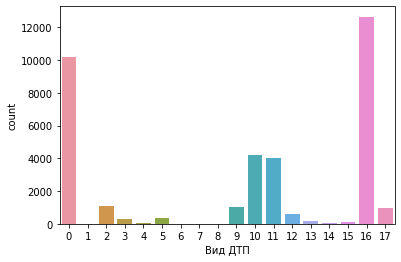

In [35]:
sns.countplot(x = "Вид ДТП" , data  = df)  

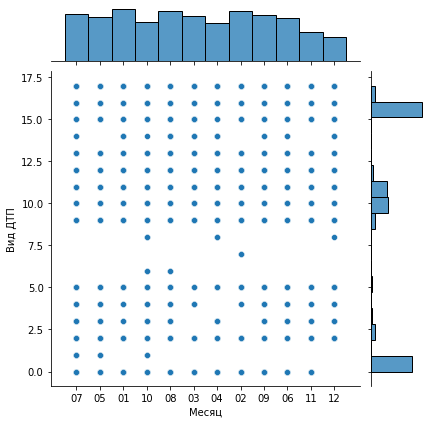

In [36]:
sns.jointplot(x = 'Месяц', y = "Вид ДТП" , data = df)

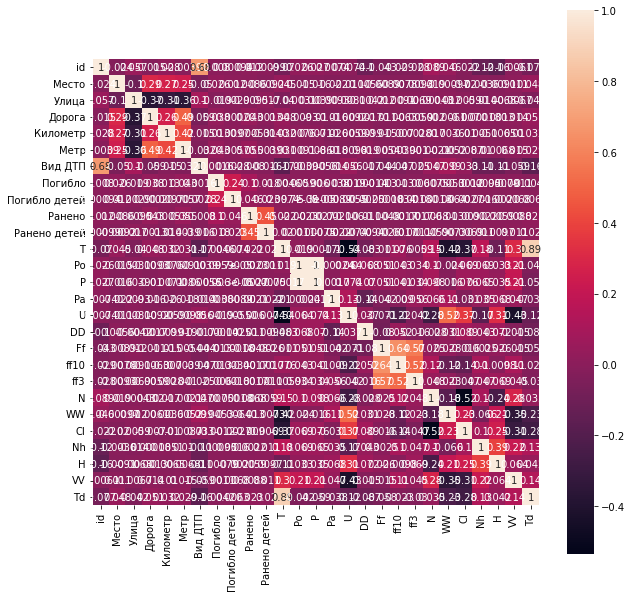

In [37]:
plt.rcParams['figure.figsize']=(10,10)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

In [38]:
df["День"] = df["День"].astype('int')
df["Месяц"] = df["Месяц"].astype('int')
df["Час"] = df["Час"].astype('int')

In [39]:
df["Год"] = df["Год"].astype('int')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35771 entries, 0 to 35770
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35771 non-null  int64  
 1   Дата           35771 non-null  object 
 2   Время          35771 non-null  object 
 3   Место          35771 non-null  int16  
 4   Улица          35771 non-null  int16  
 5   Дом            35771 non-null  object 
 6   Дорога         35771 non-null  int16  
 7   Километр       35771 non-null  float64
 8   Метр           35771 non-null  float64
 9   Вид ДТП        35771 non-null  int8   
 10  Погибло        35771 non-null  int64  
 11  Погибло детей  35771 non-null  int64  
 12  Ранено         35771 non-null  int64  
 13  Ранено детей   35771 non-null  int64  
 14  T              35771 non-null  float64
 15  Po             35771 non-null  float64
 16  P              35771 non-null  float64
 17  Pa             35771 non-null  float64
 18  U     

In [41]:
X = df.drop(["Дата", "Время","id", "Дом", "Погибло",	"Погибло детей",	"Ранено",	"Ранено детей"], axis = 1)

In [43]:
X

,Место,Улица,Дорога,Километр,Метр,Вид ДТП,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td,День,Месяц,Год,Час
0,86,60,0,0.0,0.0,16,22.9,744.2,757.7,-0.2,66.0,7,1.0,2.0,4.0,8,1,1,8,8,10.0,16.2,13,7,18,17
1,86,60,0,0.0,0.0,16,15.7,751.7,765.8,-1.2,17.0,10,4.0,10.0,10.0,10,1,0,0,0,10.0,-9.4,11,5,18,17
2,86,551,0,0.0,0.0,0,0.6,730.0,744.4,-0.3,71.0,4,3.0,5.0,7.0,7,1,6,4,8,10.0,-4.1,25,1,20,14
3,229,95,0,0.0,0.0,0,16.1,740.9,754.7,-0.2,49.0,12,2.0,4.0,6.0,8,1,4,5,8,10.0,5.4,11,5,20,11
4,259,0,102,430.0,5.0,2,-11.4,747.9,763.3,1.0,80.0,14,1.0,3.0,5.0,2,37,6,5,8,10.0,-14.2,9,1,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35766,86,0,0,0.0,0.0,16,23.4,747.4,760.9,0.1,56.0,9,1.0,4.0,4.0,3,1,4,3,2,10.0,14.2,15,5,19,7
35767,86,390,0,0.0,0.0,16,7.4,745.3,759.7,3.2,93.0,11,3.0,6.0,7.0,2,4,6,7,8,10.0,6.3,15,10,19,8
35768,365,0,0,0.0,0.0,11,4.4,739.0,753.4,-1.2,50.0,12,2.0,6.0,7.0,8,1,7,9,6,10.0,-5.3,10,3,19,9
35769,178,0,2,544.0,870.0,0,16.4,750.1,764.1,-1.5,51.0,14,2.0,6.0,9.0,8,1,6,8,8,10.0,6.1,13,9,20,5


# model 1

In [112]:
y = df[["Погибло"]]

In [113]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [114]:
model = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


kfold_5 = KFold(n_splits=10, random_state=1, shuffle=True)

model = RandomizedSearchCV(model, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [115]:
model.fit(xtrain, ytrain.values.ravel())

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0, estimator=XGBClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa74078f750>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa740745890>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa740745850>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa740981390>},
                   scoring='roc_auc', verbose=3)

# Test

In [48]:
test = pd.read_csv("/content/drive/MyDrive/Дагестан ДТП ИИ/test_dataset_test.csv")

In [49]:
test = test.set_index('id')

In [50]:
test.head(3)

,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП
id,,,,,,,,,
490078911,31.01.2018,19:15:00,"Новгородская область, Великий Новгород",Нехинская ул,59,NaN,NaN,NaN,Столкновение
490055448,19.06.2019,10:15:00,"Новгородская область, Великий Новгород",Большая Московская ул,38,NaN,NaN,NaN,Столкновение
490054440,28.06.2019,03:00:00,"Новгородская область, Великий Новгород",NaN,NaN,NaN,NaN,NaN,Наезд на препятствие


In [51]:
test.shape

(6788, 9)

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6788 entries, 490078911 to 490109680
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Дата      6788 non-null   object 
 1   Время     6788 non-null   object 
 2   Место     6788 non-null   object 
 3   Улица     3852 non-null   object 
 4   Дом       3881 non-null   object 
 5   Дорога    1905 non-null   object 
 6   Километр  1904 non-null   float64
 7   Метр      1904 non-null   float64
 8   Вид ДТП   4988 non-null   object 
dtypes: float64(2), object(7)
memory usage: 530.3+ KB


In [53]:
test = pd.merge(test, w, how='left', on='Дата')

Заменим все пропуски в данных

In [54]:
test = test.fillna(0)

Добавим пару новых столбцов

In [55]:
test["День"] = test["Дата"].str[:2]
test["Месяц"] = test["Дата"].str[3:5]
test["Год"] = test["Дата"].str[8:]
test["Час"] = test["Время"].str[:2]

In [56]:
test.head(3)

,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td,День,Месяц,Год,Час
0,31.01.2018,19:15:00,"Новгородская область, Великий Новгород",Нехинская ул,59,0,0.0,0.0,Столкновение,-9.2,736.8,751.9,1.0,82.0,"Ветер, дующий с востоко-юго-востока",3.0,8.0,10.0,100%.,Снег непрерывный слабый в срок наблюдения.,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,4.0,-11.7,31,01,18,19
1,19.06.2019,10:15:00,"Новгородская область, Великий Новгород",Большая Московская ул,38,0,0.0,0.0,Столкновение,24.0,745.6,759.1,0.2,48.0,"Ветер, дующий с северо-запада",2.0,6.0,7.0,40%.,,Кучевые средние или мощные или вместе с кучевы...,40%.,1000-1500,10.0,12.3,19,06,19,10
2,28.06.2019,03:00:00,"Новгородская область, Великий Новгород",0,0,0,0.0,0.0,Наезд на препятствие,14.2,730.3,743.8,-0.9,97.0,"Ветер, дующий с востока",2.0,0.0,8.0,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,3.0,13.8,28,06,19,03


In [57]:
min(test['Год'])

'18'

Сделаем категории **"Вид ДТП"** и **"Улица"** раноговыми 

In [58]:
test["Вид ДТП"] = pd.Categorical(test["Вид ДТП"])
test["Вид ДТП"].astype('category').cat.codes
test["Вид ДТП"] = test["Вид ДТП"].cat.codes

In [59]:
test["Улица"] = pd.Categorical(test["Улица"])
test["Улица"].astype('category').cat.codes
test["Улица"] = test["Улица"].cat.codes

In [60]:
test["Место"] = pd.Categorical(test["Место"])
test["Место"].astype('category').cat.codes
test["Место"] = test["Место"].cat.codes

In [61]:
test["Дорога"] = pd.Categorical(test["Дорога"])
test["Дорога"].astype('category').cat.codes
test["Дорога"] = test["Дорога"].cat.codes

In [62]:
test["День"] = test["День"].astype('int')
test["Месяц"] = test["Месяц"].astype('int')
test["Час"] = test["Час"].astype('int')
test["Год"] = test["Год"].astype('int')

In [63]:
test["DD"] = pd.Categorical(test["DD"])
test["DD"].astype('category').cat.codes
test["DD"] = test["DD"].cat.codes

In [64]:
test["N"] = pd.Categorical(test["N"])
test["N"].astype('category').cat.codes
test["N"] = test["N"].cat.codes

In [65]:
test["Cl"] = pd.Categorical(test["Cl"])
test["Cl"].astype('category').cat.codes
test["Cl"] = test["Cl"].cat.codes

In [66]:
test["H"] = pd.Categorical(test["H"])
test["H"].astype('category').cat.codes
test["H"] = test["H"].cat.codes

In [67]:
test["Nh"] = pd.Categorical(test["Nh"])
test["Nh"].astype('category').cat.codes
test["Nh"] = test["Nh"].cat.codes

In [68]:
test["WW"] = pd.Categorical(test["WW"])
test["WW"].astype('category').cat.codes
test["WW"] = test["WW"].cat.codes

In [69]:
test = test.drop(["Дата", "Время", "Дом"], axis = 1)

In [70]:
test.head(3)

,Место,Улица,Дорога,Километр,Метр,Вид ДТП,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td,День,Месяц,Год,Час
0,49,228,0,0.0,0.0,15,-9.2,736.8,751.9,1.0,82.0,3,3.0,8.0,10.0,2,29,8,2,7,4.0,-11.7,31,1,18,19
1,49,29,0,0.0,0.0,15,24.0,745.6,759.1,0.2,48.0,9,2.0,6.0,7.0,4,1,4,4,2,10.0,12.3,19,6,19,10
2,49,0,0,0.0,0.0,9,14.2,730.3,743.8,-0.9,97.0,1,2.0,0.0,8.0,2,6,8,2,4,3.0,13.8,28,6,19,3


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6788 entries, 0 to 6787
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Место     6788 non-null   int16  
 1   Улица     6788 non-null   int16  
 2   Дорога    6788 non-null   int16  
 3   Километр  6788 non-null   float64
 4   Метр      6788 non-null   float64
 5   Вид ДТП   6788 non-null   int8   
 6   T         6788 non-null   float64
 7   Po        6788 non-null   float64
 8   P         6788 non-null   float64
 9   Pa        6788 non-null   float64
 10  U         6788 non-null   float64
 11  DD        6788 non-null   int8   
 12  Ff        6788 non-null   float64
 13  ff10      6788 non-null   float64
 14  ff3       6788 non-null   float64
 15  N         6788 non-null   int8   
 16  WW        6788 non-null   int8   
 17  Cl        6788 non-null   int8   
 18  Nh        6788 non-null   int8   
 19  H         6788 non-null   int8   
 20  VV        6788 non-null   floa

# Pred

In [116]:
perd_test = model.predict(test)

In [117]:
perd_test

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
test2 = pd.read_csv("/content/drive/MyDrive/Дагестан ДТП ИИ/test_dataset_test.csv")

In [119]:
test2 = test2.set_index('id')

In [120]:
submit = test2[[]]

In [121]:
submit['Погибло'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
submit['Погибло'] = submit['Погибло'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
submit.head(3)

,Погибло
id,
490078911,0
490055448,0
490054440,0


# модель 2

In [124]:
y = df[["Погибло детей"]]

In [125]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [126]:
# model = CatBoostClassifier(verbose=False)

In [127]:
# model.fit(xtrain, ytrain)

In [128]:
model = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


kfold_5 = KFold(n_splits=10, random_state=1, shuffle=True)

model = RandomizedSearchCV(model, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [129]:
model.fit(xtrain, ytrain.values.ravel())

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0, estimator=XGBClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa740730090>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa74078f150>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa7406da9d0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa7406acd50>},
                   scoring='roc_auc', verbose=3)

# Pred

In [130]:
perd_test = model.predict(test)

In [131]:
perd_test

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
submit['Погибло детей'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
submit['Погибло детей'] = submit['Погибло детей'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
submit.head(3)

,Погибло,Погибло детей
id,,
490078911,0,0
490055448,0,0
490054440,0,0


# модель 3

In [135]:
y = df[["Ранено"]]

In [136]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [137]:
len(X)

35771

In [138]:
model = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


kfold_5 = KFold(n_splits=10, random_state=1, shuffle=True)

model = RandomizedSearchCV(model, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [139]:
model.fit(xtrain, ytrain.values.ravel())

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0, estimator=XGBClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa7406da190>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa74075d510>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa74075d210>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa74075dad0>},
                   scoring='roc_auc', verbose=3)

# Pred

In [140]:
perd_test = model.predict(test)

In [141]:
perd_test

array([0, 0, 1, ..., 0, 0, 0])

In [142]:
submit['Ранено'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
submit['Ранено'] = submit['Ранено'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
submit.head(3)

,Погибло,Погибло детей,Ранено
id,,,
490078911,0,0,0
490055448,0,0,0
490054440,0,0,1


# модель 4

In [145]:
y = df[["Ранено детей"]]

In [146]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [147]:
model = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


kfold_5 = KFold(n_splits=10, random_state=1, shuffle=True)

model = RandomizedSearchCV(model, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [148]:
model.fit(xtrain, ytrain.values.ravel())

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0, estimator=XGBClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa7431ac510>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa7431fd510>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa740948910>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa742e7a610>},
                   scoring='roc_auc', verbose=3)

# Pred

In [149]:
perd_test = model.predict(test)

In [150]:
perd_test

array([0, 0, 0, ..., 1, 0, 0])

In [151]:
submit['Ранено детей'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
submit['Ранено детей'] = submit['Ранено детей'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
submit.head()

,Погибло,Погибло детей,Ранено,Ранено детей
id,,,,
490078911,0,0,0,0
490055448,0,0,0,0
490054440,0,0,1,0
490037847,0,0,0,0
490037049,0,0,0,0


# Сохранение

In [154]:
submit.to_csv('submit_DTP.csv',  index=True)

In [155]:
submit

,Погибло,Погибло детей,Ранено,Ранено детей
id,,,,
490078911,0,0,0,0
490055448,0,0,0,0
490054440,0,0,1,0
490037847,0,0,0,0
490037049,0,0,0,0
...,...,...,...,...
490014641,0,0,0,0
490033115,0,0,0,0
490008221,0,0,0,1


In [156]:
submit.describe()

,Погибло,Погибло детей,Ранено,Ранено детей
count,6788.000000,6788.0,6788.000000,6788.000000
mean,0.001473,0.0,0.072481,0.003241
std,0.042023,0.0,0.262689,0.056842
min,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000
max,2.000000,0.0,2.000000,1.000000
